<H1 align="center"> ASTR3800 Final Project Writeup </H1>
<H2 align="center"> Thor Breece </H2>
<H3 align="center"> 12/08/2022 </H3>

<H2 align="center"> Abstract </H2>

<p align="center"> Through a combination of data science, statistical analysis, machine learning and intuition, I analyzed data collected by LIGO. Throughout the project, I analyzed the Event Demographics of the LIGO data as a whole, the neutron star - neutron star merger GW170817, and discovered hidden correlations between variables within the data set. This helped me to understand the limitations of LIGO, how standard sirens, often sources of LIGO GW signals, 
are used to calculate the hubble constant, and the correlation between the Signal to Noise ratio and Luminosity Distance. </p>

<H2 align="center"> Gravitational Waves and LIGO </H2>

&nbsp;&nbsp;&nbsp;&nbsp;Gravitational waves (GWs) are ripples in gravity that are caused by the movement of massive objects such as black holes and neutron stars. Most often the gravitational waves detected are from merger events [1]. Such events can range from neutron star - neutron star mergers to black hole - black hole mergers. Gravitational waves cause a strain on an object. Causing it to either shrink or stretch based on the direction of the gravitational wave in relation to the object. Why should such a miniscule affect be studied at all? Because gravitational waves can be used to test theories of gravity and help us to understand the properties of black holes, neutron stars, and other objects in the universe. 

&nbsp;&nbsp;&nbsp;&nbsp;The Laser Interferometer Gravitational-Wave Observatory, or LIGO, is the facility that is used to detect gravitational waves. In a similar way that the oscilation of electrons to measure electro-magnetic fields, LIGO measures the dimensionless strain of mass, to detect gravitational waves [2]. A caviat of this measurement is that the dimensionless strain is only $10^{-21}$ m, which is less than the size of a proton over a kilometer. As such, detecting dimensionless strain caused by gravitational waves is extremely sensitive to enviromental changes. A truck driving by, a person walking within the facility, and even minute siesmic activity can through off the accuracy of LIGO's measurements [2]. LIGO has accounted for a number of these systematic erros in the design of its interferometer used to detect GWs. LIGO uses 2 4km arms equiped with mirrors and test masses to detect gravitational waves <i>(figure 1)</i>. Due to the extremely small change over such large distances, the longer the arms, the better chance of detecting gravitational waves.  
<figure align="center">
    <img src=interferometer.jpg width="500"> 
    <figcaption>
    <B> figure 1: </B> <cite> <a
    href = "https://www.ligo.caltech.edu/page/what-is-interferometer"> LIGO Interferometer Model 
    </a>
</figure>

<a href = "https://www.ligo.caltech.edu/page/ligos-ifo"> </a>


[1] LIGO Scientific Collaboration, B. P. Abbott et al. (2016). "Observation of Gravitational Waves from a Binary Black Hole Merger". Physical Review Letters. 116 (6): 061102. \
[2] What is an Interferometer? (n.d.). LIGO Lab | Caltech


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy import units as u
from astropy import constants as co
import linear_least_squares as lsq
from scipy.stats import pearsonr

<H2 align="center"> 1 Event Demographics </H2>

<H3 align="center">1.1 Redshift Limit of LIGO</H3>
&nbsp;&nbsp;&nbsp;&nbsp; The redshift limit of LIGO is the maximum stretching that a gravitationalwave can recieve before it falls below the detection range of LIGO's interferometers. To determine the redshift limit of LIGO based on the data provided, plotting the redshfit of each event and applying a color map to the plot helps to better visualize the redshift of each event in the LIGO data provided (<i>figure 2</i>). It became abundantly clear that the circled point in figure 1 was the maximum detected value. While a bit of an outlier, it shows the maximum redshift LIGO was able to detect. This redshift is quantifed below the plot.


<!-- <figure align="center">
    <img src=max_redshift.png width="500"> 
    <figcaption>
    <B> figure 2: </B> Redshift for each Event in provided LIGO data
    </figcaption>
</figure> -->


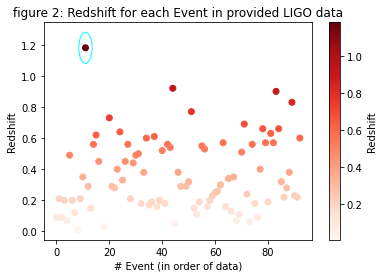

In [3]:
ligo = pd.read_csv("LIGO.csv")
event_arr = np.linspace(0,92,93)
plt.scatter(event_arr, ligo["redshift"], c=ligo["redshift"], cmap="Reds")
cbar = plt.colorbar()
cbar.set_label("Redshift")
plt.xlabel("# Event (in order of data)")
plt.ylabel("Redshift")
plt.title("figure 2: Redshift for each Event in provided LIGO data")
fig = plt.gcf()
ax = fig.gca()
e = Ellipse((ligo["redshift"].argmax(), ligo["redshift"].max()), 5, 0.2, fc='None', ec='cyan')
ax.add_patch(e);



In [4]:
print(f'The circled data point in the above plot represents the maximum redshift in the given dataset. \nFinding this value within the data, the redshift limit is {ligo["redshift"].max()}' )


The circled data point in the above plot represents the maximum redshift in the given dataset. 
Finding this value within the data, the redshift limit is 1.18


<H3 align="center">1.2 Relationship between binary mass and distance</H3> 


&nbsp;&nbsp;&nbsp;&nbsp; To determine if the binary mass is correlated to the distance, plotting the total mass of the system versus luminosity distance is helpful (<i>figure 3</i>). Inuitively it appears to have a linear correlation so then next step was to perform a linear least squares curve fit of the data to determine if it fit a model. The red line represents the model and the green lines represent 1 $\sigma$ of the data. As can be seen, the majority of the data falls within 1 $\sigma$ of the model. This provides compelling evidence that a correlation exists, but is not strong enough to come to a conclusion.

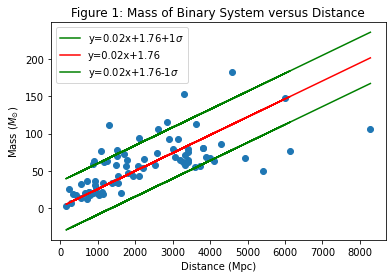

In [5]:
ligo = ligo[ligo['luminosity_distance'].notna()]
ligo = ligo[ligo['total_mass_source'].notna()]
plt.scatter(ligo["luminosity_distance"], ligo["total_mass_source"])
plt.xlabel("Distance (Mpc)")
plt.ylabel(r"Mass ($M_{\odot}$)");
uslope = lsq.m_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
uintercept = lsq.b_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
model = uslope * ligo["luminosity_distance"] + uintercept
div = ligo["total_mass_source"].std()
plt.plot(ligo["luminosity_distance"], model+div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}+$1\sigma$')
plt.plot(ligo["luminosity_distance"], model, color="r", label=f'y={uslope:.2f}x+{uintercept:.2f}')
plt.plot(ligo["luminosity_distance"], model-div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}-$1\sigma$')
plt.title("Figure 1: Mass of Binary System versus Distance")
plt.legend();

To determien the strength of the signal, the next step is to compute the correlation coefficeint of the two variables. 

In [13]:
def cor(x,y):
    mean_x = np.average(x)
    mean_y = np.average(y)
    numerator = np.sum((x - mean_x)*(y-mean_y))
    denominator = np.sqrt(np.sum((x-mean_x)**2) * np.sum((y-mean_y)**2))
    return numerator / denominator
print(f'Correlation coefficient: {cor(ligo["total_mass_source"],ligo["luminosity_distance"]):.2f}')

Correlation coefficient: 0.67



<!-- ```
def cor(x,y):
    mean_x = np.average(x)
    mean_y = np.average(y)
    numerator = np.sum((x - mean_x)*(y-mean_y))
    denominator = np.sqrt(np.sum((x-mean_x)**2) * np.sum((y-mean_y)**2))
    return numerator / denominator
```  -->
This correlation coefficient shows that the two varialbes have a reasonabaly significant correlation. To determine the likelyhood that such a correlation happened by chance, running a pearsonr calculation to determine the probability of finding such a correlation in uncorrelated data is a clear next step.

<!-- <figure align="center">
    <img src=mass_lumen.png width="500"> 
    <figcaption>
    <B> figure 3: </B> The relationship between the mass of a binary system and its luminosity distance with a model, with standard deviation, representing said relationship.
    </figcaption>
</figure> -->

In [14]:
r, p = pearsonr(ligo["total_mass_source"],ligo["luminosity_distance"])
print(f'p = {p:.2g}')

p = 1.9e-11


Given that the pearson probability was extrmeely low, it is highly likely that the correlation did not occured merely by chance. The significance of this is that detectable GWs from deep space binary systems have to come from massive objects, otherwise the signal is too faint for LIGO to detect - being lost in the noise or redshifted past LIGO's detection limit.

<H3 align="center">1.3 Mass to Gravitational Wave conversion </H3>

&nbsp;&nbsp;&nbsp;&nbsp; The amount of mass lost from a given merger is easily calculated from the difference of the total mass prior to the merger and the final mass after the merger.
$$
m_{T} - m_{F} = m_{\Delta}
$$
The fraction of the original mass coverted into GWs can be calculated as
$$
m_{frac} = 1 - \frac{m_{T}}{m_{F}}
$$

<!-- <figure align="center">
    <img src=energy.png width="500"> 
    <figcaption>
    <B> figure 3: </B> The Energy released from each merger event.
    </figcaption>
</figure> -->

In [6]:
ligo = ligo[ligo["total_mass_source"].notna()]
ligo = ligo[ligo["final_mass_source"].notna()]
massToGW = ligo["total_mass_source"] - ligo['final_mass_source']
mass_frac = 1 - (ligo["final_mass_source"] /ligo["total_mass_source"])
mass_delta = list(ligo["total_mass_source"] - ligo["final_mass_source"])
mass_frac_avg = np.average(mass_frac)
mass_frac_std = np.std(mass_frac)
print(f'The average fraction of mass converted to GWs is {mass_frac_avg:.3f} and the spread, or standard deviation in this fraction is {mass_frac_std:.5f}.')


The average fraction of mass converted to GWs is 0.043 and the spread, or standard deviation in this fraction is 0.01035.


<H3 align="center">1.4 Gravitational Wave Luminosities</H3>


What happens to this fraction of mass? It is converted back in to energy according to the famous equation $ E = mc^{2}$. As shown in <i>figure 4</i>, this equates to massive amounts of energy for each of the mergers in the data. Unsuprisingly, it looks very similar to the redshift plot. As the redshift (by extention of the fact that distance is correlated with mass) was determined to be correlated to mass in part 1.2, it makes sense that the Energy would be correlated to redshift as well.

Before this calculation, however, it was necessary to define an inband peak duration. From tutorial 12 part 1.9 we get an inband peak of 63 ms, which is the assumption for this calculation of GW luminosity.

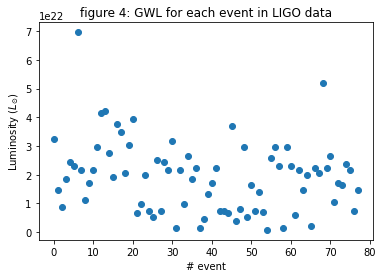

In [7]:
m_tot = ligo["total_mass_source"].to_numpy()
m_fin = ligo["final_mass_source"].to_numpy()
dM = (m_tot - m_fin) * u.M_sun
E = dM * co.c ** 2
E = [i.decompose() for i in E]
duration = 0.063 * u.second
gwL = [(i / duration).to('L_sun') for i in E]
gwL_plotting = [i.value for i in gwL]
# print("from tutorial 12 part 1.9 we get a inband peak duration which I will be using as the assumption for the caluclation of GW luminosity")
plt.scatter(range(len(gwL)), gwL_plotting)
plt.title("figure 4: GWL for each event in LIGO data")
plt.xlabel("# event")
plt.ylabel(r"Luminosity ($L_{\odot}$)");


In [8]:
print(f'The spread in the GW Luminosity is {np.array(gwL_plotting).std():.2e} Solar Luminosities.')
supernovae = 570000000000
ratio = np.array(gwL_plotting).max() / supernovae
print(f'Comparing the most luminous event with a luminosity of {np.array(gwL_plotting).max():.2e} solar luminosities to the luminosity of the most luminous supernovae, ASASSN-15lh, which is {supernovae:.2e} Solar Luminosities [3]. It is {ratio:.2e} times more luminous.')
# SOURCE GIA CATALOG

The spread in the GW Luminosity is 1.24e+22 Solar Luminosities.
Comparing the most luminous event with a luminosity of 6.97e+22 solar luminosities to the luminosity of the most luminous supernovae, ASASSN-15lh, which is 5.70e+11 Solar Luminosities [3]. It is 1.22e+11 times more luminous.


[3] Dong, Subo; et al. (2015). "ASASSN-15lh: A highly super-luminous supernova". Science. 351 (6276): 257–260.

<H3 align="center">1.5 Binary Mass Ratio</H3>

While this did not result in an obvious distribution of the binary mass ratio, <i>figure 5</i> shows the linear relationship between the masses of the two objects in a binary system.

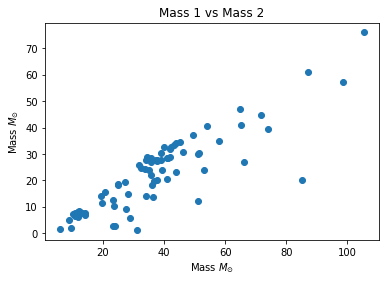

In [9]:
plt.scatter(ligo["mass_1_source"], ligo["mass_2_source"])
plt.title("Mass 1 vs Mass 2")
plt.xlabel(r'Mass $M_{\odot}$')
plt.ylabel(r'Mass $M_{\odot}$');


By plotting a histogram of the ratio of mass 1 to mass 2 it becomes clear that the most common binary mass ratio sits within the range of 1 to 5 (<i>figure 6</i>). 

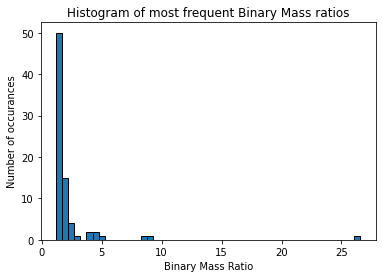

In [10]:
b_mass_r = ligo["mass_1_source"] / ligo["mass_2_source"]
plt.hist(b_mass_r, bins=50,edgecolor='black')
plt.xlabel("Binary Mass Ratio")
plt.ylabel("Number of occurances")
plt.title("Histogram of most frequent Binary Mass ratios");

In [38]:
print(f'The minimum binary mass ratio is {b_mass_r.min():.2f} and the maximum binary mass ratio is {b_mass_r.max():.2f}')

The minimum binary mass ratio is 1.19 and the maximum binary mass ratio is 26.58


<H2 align="center"> 2 Standard Sirens </H2>

<H3 align="center">2.1 GW170817: a neutron star - neutron star merger </H3>

GW170817 is a notable merger as it can be used as a "standard siren" thus it can be used to measure the Hubble constant with little information than it's luminosity distance and host galaxy's recession velocity.

In [11]:
ligo = pd.read_csv("LIGO.csv")
GW170817 = ligo.loc[ligo["commonName"] == "GW170817"]
dl = float(GW170817["luminosity_distance"].to_string(index=False))
ldu = float(GW170817["luminosity_distance_upper"].to_string(index=False))
ldl = float(GW170817["luminosity_distance_lower"].to_string(index=False))
print(f'The luminosity distance of this merger is {dl} Mpc with an uncertainty of + {ldu} and {ldl} Mpc.')

The luminosity distance of this merger is 40.0 Mpc with an uncertainty of + 7.0 and -15.0 Mpc.


<H3 align="center">2.2 Hubble constant calculation</H3>

To determine the hubble constant from the Luminosity Distance $D_L$ and the recesion velocity $v$:
$$
cz = H_0 D_L
$$
To avoid confusion and to simplify the problem, the equation for redshift was plugged into the equation. This is an extra step but helps clarify the relationship: $z = \frac{v}{c} $
$$
cz = H_0D_L \\
H_0 = \frac{cz}{D_L} \\
\text{after plugging in the equation for redshift:} \\ 
H_0 = \frac{v}{D_L} 
$$
Computing the Hubble cosntant based on GW170817 in python:

In [42]:
v = 3017

H_0 = v / dl
print(f'The Hubble Constant as calculated via this merger is {H_0:.2f} km/s/mpc ')

The Hubble Constant as calculated via this merger is 75.42 km/s/mpc 


This value is close to the current calculation of 74 km/s/Mpc.

<H3 align="center">2.3 Uncertainty on the Hubble constant</H3>

To calculate the uncertainty on the Hubble cosntant, error propagation must be performed on both the Luminosity distance and the velocity. To perform error propogation the formula for a multivariable equation is:
$$
\sigma^{2}_f = (\frac{\partial f}{\partial x})^{2} \sigma^{2}_x + (\frac{\partial f}{\partial y})^{2} \sigma^{2}_y + ...
$$
For this instance: 
$$
\sigma^{2}_{H_{0}} = (\frac{\partial}{\partial v}\frac{v}{D_L})^{2}\sigma_{v}^2 + (\frac{\partial}{\partial D_L}\frac{v}{D_L})^{2}\sigma_{D_L}^2 \\
\sigma_{H_0} = \sqrt{(\frac{\partial}{\partial v}\frac{v}{D_L})^{2}\sigma_{v}^2 + (\frac{\partial}{\partial D_L}\frac{v}{D_L})^{2}\sigma_{D_L}^2 } \\
\sigma_{H_0} = \sqrt{(\frac{1}{D_L})^2 \sigma_{v}^2 + (\frac{-v}{(D_L)^2})^2 \sigma_{D_L}^2} \\
 \sigma_{H_0} = \sqrt{(D_L)^{-2}\sigma_{v}^2 + \frac{v^{2}}{(D_L)^4}\sigma_{D_L}^2} \\
$$
As there is an asymetric uncertainty on $D_L$, error propegation is done using the upper, lower and the average uncertainty of $D_L$.

In [12]:
sig_v = 166
sigma_H_u = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldu ** 2)
sigma_H_l = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldl ** 2)
sigma_H_a = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * 11 ** 2)
print(f'Uncertainty using upper bound of Luminosity Distance {sigma_H_u:.2f}')
print(f'Uncertainty using lower bound of Luminosity Distance {sigma_H_l:.2f}')
print(f'Uncertainty using average bound of Luminosity Distance {sigma_H_a:.2f}')

Uncertainty using upper bound of Luminosity Distance 13.84
Uncertainty using lower bound of Luminosity Distance 28.59
Uncertainty using average bound of Luminosity Distance 21.15


The error based on this calculation is way off the mark compared to the error of $\pm$ 2.4 km/s/mpc. To reduce the error within 10% we would need at hundreds of similar events and to reduce the error within 1% we would need thousands if not tens of thousands of similar events.

<H3 align="center">3 Finding Hidden Correlations</H3>

There are many correlations between the variables within the LIGO data. Soem of them ore obvious ones are how the final mass goes up perfectly linearly with the total mass. Similarly as obvious, as they are directly calculated from one another, redshift and luminosity distance show a indisputable correlation. What is more intriguing are the not obvious correlations and the suprising and confusing correlations. The objective not only being to discover hidden connections between variables but to better understand the data as a whole.  

Firstly, a correlation matrix was generated generate between all variables after some cleaning up of the data was done. Due to a large number of missing values and a number of columns that seem likely to produce errors. These columns were dropped from the dataset. 

In [13]:
pd.set_option("display.max_columns", None)


In [14]:
ligo = pd.read_csv("LIGO.csv")
cols = list(ligo.columns)
ligo.fillna(0, inplace=True)

quant = ligo

quant.drop(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference', 'jsonurl'], axis = 1, inplace=True)
cols = list(quant.columns)

In [15]:
corrr = quant.corr()
droppable = ["chirp_mass", "chirp_mass_lower", "chirp_mass_upper", "far_lower", "far_upper", "p_astro_upper", "p_astro_lower"]
corr = corrr.drop(droppable, axis = 1)

cor = corr.dropna()
print(f"Due to NaN occuring in a fair number of the upper and lower bounds on some variables, \nThese {droppable} \nwere dropped from the correlation matrix")
cor

Due to NaN occuring in a fair number of the upper and lower bounds on some variables, 
These ['chirp_mass', 'chirp_mass_lower', 'chirp_mass_upper', 'far_lower', 'far_upper', 'p_astro_upper', 'p_astro_lower'] 
were dropped from the correlation matrix


,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,chi_eff,chi_eff_lower,chi_eff_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,chirp_mass_source,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,1.000000,-0.836269,0.562270,0.887676,-0.900422,0.922229,-0.110595,-0.257566,0.258132,0.730336,-0.712231,0.662752,0.205470,-0.676580,0.601442,0.885688,-0.812106,0.640544,0.949259,-0.934089,0.884363,0.745512,-0.725662,0.673544,-0.007988,0.093121,0.983488,-0.849534,0.630959
mass_1_source_lower,-0.836269,1.000000,-0.828535,-0.568071,0.711730,-0.898225,0.349217,0.547325,-0.588031,-0.804140,0.806657,-0.866988,-0.412397,0.756592,-0.691879,-0.729642,0.900573,-0.850773,-0.678199,0.822254,-0.888634,-0.802016,0.808912,-0.866802,-0.213490,0.153595,-0.758022,0.937873,-0.854995
mass_1_source_upper,0.562270,-0.828535,1.000000,0.359750,-0.532617,0.636376,-0.344238,-0.542651,0.702981,0.593601,-0.604560,0.746210,0.379709,-0.634561,0.690389,0.489191,-0.770688,0.949197,0.435975,-0.602075,0.716073,0.600227,-0.623515,0.754730,0.284003,-0.176180,0.505128,-0.804109,0.977386
mass_2_source,0.887676,-0.568071,0.359750,1.000000,-0.911964,0.779176,0.024964,-0.008197,0.023920,0.570803,-0.548763,0.443756,-0.005803,-0.542892,0.514833,0.824987,-0.653423,0.450468,0.985843,-0.863293,0.760073,0.599667,-0.576396,0.463283,-0.086445,0.222898,0.955395,-0.683857,0.437540
mass_2_source_lower,-0.900422,0.711730,-0.532617,-0.911964,1.000000,-0.895529,0.151433,0.150079,-0.182771,-0.646336,0.646572,-0.595655,-0.083591,0.634410,-0.650846,-0.868117,0.789742,-0.607767,-0.932792,0.967149,-0.884494,-0.666397,0.668586,-0.610215,-0.019749,-0.049260,-0.930379,0.805391,-0.589172
mass_2_source_upper,0.922229,-0.898225,0.636376,0.779176,-0.895529,1.000000,-0.280728,-0.361336,0.389918,0.815483,-0.826858,0.827404,0.249988,-0.736659,0.685756,0.854640,-0.895920,0.712259,0.853188,-0.954304,0.975359,0.819218,-0.833242,0.830086,0.177403,-0.075916,0.895344,-0.919999,0.696836
network_matched_filter_snr,-0.110595,0.349217,-0.344238,0.024964,0.151433,-0.280728,1.000000,0.581301,-0.441130,-0.455209,0.461442,-0.469594,-0.161008,0.450793,-0.448745,-0.130492,0.347640,-0.333382,-0.026059,0.227052,-0.303416,-0.463817,0.474338,-0.484218,-0.224901,0.387586,-0.064574,0.352203,-0.340329
network_matched_filter_snr_lower,-0.257566,0.547325,-0.542651,-0.008197,0.150079,-0.361336,0.581301,1.000000,-0.817297,-0.487856,0.489776,-0.623510,-0.231526,0.585364,-0.548700,-0.296407,0.542369,-0.561993,-0.087076,0.253999,-0.394109,-0.493800,0.499734,-0.638689,-0.357351,0.150394,-0.175326,0.514041,-0.527470
network_matched_filter_snr_upper,0.258132,-0.588031,0.702981,0.023920,-0.182771,0.389918,-0.441130,-0.817297,1.000000,0.426937,-0.440702,0.676960,0.261816,-0.588897,0.581646,0.275318,-0.594578,0.673226,0.094421,-0.266956,0.465225,0.435492,-0.461435,0.691294,0.601730,-0.182484,0.186712,-0.582241,0.662470
luminosity_distance,0.730336,-0.804140,0.593601,0.570803,-0.646336,0.815483,-0.455209,-0.487856,0.426937,1.000000,-0.989751,0.895056,0.417430,-0.727114,0.577861,0.698823,-0.795239,0.667054,0.643064,-0.746192,0.819701,0.995870,-0.983113,0.886440,0.138640,-0.100031,0.690123,-0.808712,0.650764


From this initial correlation matrix, a vast number of the variables had correlation coefficeints, $\rho$ where |$\rho$| was close to 1. Meaning that most of the variables were strongly correlated to each other. This makes intuitive sense as they are all parameters of the same event, however some don't make as much sense being as correlated as they are. To better understand which correlations were most likely true correlations, the next step was to feed the correlation matrix into an algorithm to produce a pearsonr test matrix.

In [16]:

cols = list(cor.columns)
pearsonDict = {}
for i in cols:
    temp = {}
    for j in cols:
        r, temp[j] = pearsonr(cor[i], cor[j])
    pearsonDict[i] = temp        

pearsonDf = pd.DataFrame.from_dict(pearsonDict)

pearsonDf

,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,chi_eff,chi_eff_lower,chi_eff_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,chirp_mass_source,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,0.000000e+00,2.952065e-17,1.246870e-11,7.681062e-21,7.144420e-31,1.413249e-25,2.186359e-05,2.249948e-06,3.867973e-06,3.136846e-16,9.057529e-16,4.357122e-13,4.601379e-05,1.406911e-15,1.812327e-14,7.722088e-33,3.368283e-18,1.532938e-13,5.192259e-26,1.630534e-33,2.890195e-22,1.037333e-16,3.820235e-16,2.758241e-13,1.549977e-02,0.229203,3.508650e-34,1.231781e-18,3.806204e-13
mass_1_source_lower,2.952065e-17,0.000000e+00,8.094217e-21,3.753804e-11,2.104759e-15,3.659050e-23,1.609188e-08,1.434990e-10,2.236819e-10,1.007265e-22,4.911785e-23,8.289530e-24,2.383769e-07,6.253126e-23,4.392393e-20,3.753790e-17,5.474945e-32,7.705030e-25,5.886118e-13,1.168080e-18,6.214730e-26,6.433552e-23,1.256152e-23,2.525131e-24,3.388679e-04,0.025754,5.845433e-15,6.873241e-34,5.157248e-24
mass_1_source_upper,1.246870e-11,8.094217e-21,0.000000e+00,6.090546e-08,8.245046e-11,2.044474e-14,1.111211e-09,4.955593e-13,7.658591e-14,2.675472e-15,1.079682e-15,9.388695e-20,1.245116e-07,1.263230e-17,3.071341e-18,1.212501e-11,4.895309e-19,1.388283e-30,4.210593e-09,1.565564e-12,5.386165e-16,2.843388e-15,6.506532e-16,5.066937e-20,3.434831e-05,0.007280,2.408078e-10,4.748794e-19,4.057670e-34
mass_2_source,7.681062e-21,3.753804e-11,6.090546e-08,9.704894e-205,1.989998e-23,1.815141e-15,9.768584e-04,2.682206e-04,3.905596e-04,5.153927e-11,1.051495e-10,8.028237e-09,1.670918e-03,8.876831e-11,2.147474e-10,5.230305e-20,6.811159e-12,3.427911e-09,1.031650e-32,6.039683e-19,4.198612e-14,2.524420e-11,6.254192e-11,5.890683e-09,9.998037e-02,0.629649,2.892281e-25,4.349177e-12,6.051949e-09
mass_2_source_lower,7.144420e-31,2.104759e-15,8.245046e-11,1.989998e-23,0.000000e+00,1.468906e-22,4.244728e-05,7.840119e-06,1.101391e-05,1.822501e-14,3.847795e-14,6.183032e-12,1.826611e-04,2.020617e-14,6.089007e-14,2.842232e-29,1.206024e-16,1.453581e-12,7.009607e-29,8.853396e-31,2.491595e-20,6.805960e-15,1.705361e-14,3.917765e-12,2.002270e-02,0.251361,2.699745e-34,5.957291e-17,3.324090e-12
mass_2_source_upper,1.413249e-25,3.659050e-23,2.044474e-14,1.815141e-15,1.468906e-22,0.000000e+00,7.123515e-07,5.496295e-08,9.464447e-08,4.631302e-21,9.894113e-21,1.889477e-17,6.205122e-06,7.489701e-20,1.312369e-17,2.437694e-25,2.268857e-25,6.163557e-17,3.022607e-18,1.367952e-29,3.959121e-36,1.053057e-21,2.388793e-21,9.751849e-18,2.338337e-03,0.078791,1.343855e-21,2.689311e-26,2.233381e-16
network_matched_filter_snr,2.186359e-05,1.609188e-08,1.111211e-09,9.768584e-04,4.244728e-05,7.123515e-07,7.230709e-213,1.293376e-14,2.120415e-12,6.127532e-09,3.612820e-09,1.341754e-10,1.249804e-06,2.737687e-09,4.615810e-09,1.569187e-05,3.001843e-08,3.837445e-09,2.758899e-04,6.699207e-06,2.374753e-07,7.580384e-09,3.771030e-09,1.348714e-10,1.020624e-06,0.000120,7.768916e-05,3.594926e-08,3.101063e-09
network_matched_filter_snr_lower,2.249948e-06,1.434990e-10,4.955593e-13,2.682206e-04,7.840119e-06,5.496295e-08,1.293376e-14,0.000000e+00,3.142143e-23,6.673105e-10,3.838629e-10,8.258444e-13,3.468067e-07,1.964702e-11,2.688929e-11,1.439036e-06,3.795220e-10,5.489724e-12,5.848340e-05,9.163638e-07,1.254976e-08,7.625626e-10,3.406929e-10,6.956260e-13,1.090325e-07,0.001586,1.138962e-05,5.878885e-10,4.883177e-12
network_matched_filter_snr_upper,3.867973e-06,2.236819e-10,7.658591e-14,3.905596e-04,1.101391e-05,9.464447e-08,2.120415e-12,3.142143e-23,1.973676e-203,4.185701e-09,2.189670e-09,1.932310e-12,5.600883e-07,6.924753e-11,5.057236e-11,2.690050e-06,4.824583e-10,2.866801e-12,9.132304e-05,1.4607

Soem obvious results from this are that there is a high probability that the correlation coefficients of upper and lower bounds in reference to the variables they are bounded on are highly unlikely to be found in uncorrelated data. This is a pretty obvious and expected result. To find more nuanced and hidden correlations tje maxtric was narrowed down to only correlations with a pearsonr probability of less than 0.05.  

In [17]:
def onlySignificant(pearson, thresh):
    col = pearson.columns
    goodPearson = {}
    for i in col:
        temp = {}
        for j in col:
            if pearson[i][j] <= thresh:
                temp[j] = pearson[i][j]
        goodPearson[i] = temp
    return goodPearson
gP = onlySignificant(pearsonDf, 0.05)

gPdf = pd.DataFrame.from_dict(gP)
gPdf

,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,chi_eff,chi_eff_lower,chi_eff_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,chirp_mass_source,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,0.000000e+00,2.952065e-17,1.246870e-11,7.681062e-21,7.144420e-31,1.413249e-25,2.186359e-05,2.249948e-06,3.867973e-06,3.136846e-16,9.057529e-16,4.357122e-13,4.601379e-05,1.406911e-15,1.812327e-14,7.722088e-33,3.368283e-18,1.532938e-13,5.192259e-26,1.630534e-33,2.890195e-22,1.037333e-16,3.820235e-16,2.758241e-13,1.549977e-02,NaN,3.508650e-34,1.231781e-18,3.806204e-13
mass_1_source_lower,2.952065e-17,0.000000e+00,8.094217e-21,3.753804e-11,2.104759e-15,3.659050e-23,1.609188e-08,1.434990e-10,2.236819e-10,1.007265e-22,4.911785e-23,8.289530e-24,2.383769e-07,6.253126e-23,4.392393e-20,3.753790e-17,5.474945e-32,7.705030e-25,5.886118e-13,1.168080e-18,6.214730e-26,6.433552e-23,1.256152e-23,2.525131e-24,3.388679e-04,0.025754,5.845433e-15,6.873241e-34,5.157248e-24
mass_1_source_upper,1.246870e-11,8.094217e-21,0.000000e+00,6.090546e-08,8.245046e-11,2.044474e-14,1.111211e-09,4.955593e-13,7.658591e-14,2.675472e-15,1.079682e-15,9.388695e-20,1.245116e-07,1.263230e-17,3.071341e-18,1.212501e-11,4.895309e-19,1.388283e-30,4.210593e-09,1.565564e-12,5.386165e-16,2.843388e-15,6.506532e-16,5.066937e-20,3.434831e-05,0.007280,2.408078e-10,4.748794e-19,4.057670e-34
mass_2_source,7.681062e-21,3.753804e-11,6.090546e-08,9.704894e-205,1.989998e-23,1.815141e-15,9.768584e-04,2.682206e-04,3.905596e-04,5.153927e-11,1.051495e-10,8.028237e-09,1.670918e-03,8.876831e-11,2.147474e-10,5.230305e-20,6.811159e-12,3.427911e-09,1.031650e-32,6.039683e-19,4.198612e-14,2.524420e-11,6.254192e-11,5.890683e-09,NaN,NaN,2.892281e-25,4.349177e-12,6.051949e-09
mass_2_source_lower,7.144420e-31,2.104759e-15,8.245046e-11,1.989998e-23,0.000000e+00,1.468906e-22,4.244728e-05,7.840119e-06,1.101391e-05,1.822501e-14,3.847795e-14,6.183032e-12,1.826611e-04,2.020617e-14,6.089007e-14,2.842232e-29,1.206024e-16,1.453581e-12,7.009607e-29,8.853396e-31,2.491595e-20,6.805960e-15,1.705361e-14,3.917765e-12,2.002270e-02,NaN,2.699745e-34,5.957291e-17,3.324090e-12
mass_2_source_upper,1.413249e-25,3.659050e-23,2.044474e-14,1.815141e-15,1.468906e-22,0.000000e+00,7.123515e-07,5.496295e-08,9.464447e-08,4.631302e-21,9.894113e-21,1.889477e-17,6.205122e-06,7.489701e-20,1.312369e-17,2.437694e-25,2.268857e-25,6.163557e-17,3.022607e-18,1.367952e-29,3.959121e-36,1.053057e-21,2.388793e-21,9.751849e-18,2.338337e-03,NaN,1.343855e-21,2.689311e-26,2.233381e-16
network_matched_filter_snr,2.186359e-05,1.609188e-08,1.111211e-09,9.768584e-04,4.244728e-05,7.123515e-07,7.230709e-213,1.293376e-14,2.120415e-12,6.127532e-09,3.612820e-09,1.341754e-10,1.249804e-06,2.737687e-09,4.615810e-09,1.569187e-05,3.001843e-08,3.837445e-09,2.758899e-04,6.699207e-06,2.374753e-07,7.580384e-09,3.771030e-09,1.348714e-10,1.020624e-06,0.000120,7.768916e-05,3.594926e-08,3.101063e-09
network_matched_filter_snr_lower,2.249948e-06,1.434990e-10,4.955593e-13,2.682206e-04,7.840119e-06,5.496295e-08,1.293376e-14,0.000000e+00,3.142143e-23,6.673105e-10,3.838629e-10,8.258444e-13,3.468067e-07,1.964702e-11,2.688929e-11,1.439036e-06,3.795220e-10,5.489724e-12,5.848340e-05,9.163638e-07,1.254976e-08,7.625626e-10,3.406929e-10,6.956260e-13,1.090325e-07,0.001586,1.138962e-05,5.878885e-10,4.883177e-12
network_matched_filter_snr_upper,3.867973e-06,2.236819e-10,7.658591e-14,3.905596e-04,1.101391e-05,9.464447e-08,2.120415e-12,3.142143e-23,1.973676e-203,4.185701e-09,2.189670e-09,1.932310e-12,5.600883e-07,6.924753e-11,5.057236e-11,2.690050e-06,4.824583e-10,2.866801e-12,9.132304e-05,1.460744e-06,1.750544e-08,4.807895e

After the first threshhold, it still displays most of the data as many appear to be statistically significant so the threshold was lowered even further and, as the correlation is obvious, uncertainties were dropped as well.

In [19]:
gP = onlySignificant(pearsonDf, 0.001)
droppable = ['mass_1_source_lower', 'mass_1_source_upper',
       'mass_2_source_lower', 'mass_2_source_upper','network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper','luminosity_distance_lower', 'luminosity_distance_upper',
       'chi_eff_lower', 'chi_eff_upper','total_mass_source_lower', 'total_mass_source_upper',
       'chirp_mass_source_lower','chirp_mass_source_upper', 'redshift_lower',
       'redshift_upper','final_mass_source_lower', 'final_mass_source_upper']
gPdf = pd.DataFrame.from_dict(gP)
revised = gPdf.drop(droppable, axis = 1)
final = revised.drop(droppable, axis = 0)
final

,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,chi_eff,total_mass_source,chirp_mass_source,redshift,far,p_astro,final_mass_source
mass_1_source,0.000000e+00,7.681062e-21,2.186359e-05,3.136846e-16,4.601379e-05,7.722088e-33,5.192259e-26,1.037333e-16,NaN,NaN,3.508650e-34
mass_2_source,7.681062e-21,9.704894e-205,9.768584e-04,5.153927e-11,NaN,5.230305e-20,1.031650e-32,2.524420e-11,NaN,NaN,2.892281e-25
network_matched_filter_snr,2.186359e-05,9.768584e-04,7.230709e-213,6.127532e-09,1.249804e-06,1.569187e-05,2.758899e-04,7.580384e-09,0.000001,0.00012,7.768916e-05
luminosity_distance,3.136846e-16,5.153927e-11,6.127532e-09,0.000000e+00,1.048579e-07,2.615198e-16,1.095267e-12,1.270112e-47,0.000744,NaN,2.275263e-14
chi_eff,4.601379e-05,NaN,1.249804e-06,1.048579e-07,8.376948e-209,6.785248e-05,4.835460e-04,1.754188e-07,0.000551,NaN,1.643364e-04
total_mass_source,7.722088e-33,5.230305e-20,1.569187e-05,2.615198e-16,6.785248e-05,7.230709e-213,3.810319e-24,8.232555e-17,NaN,NaN,2.296272e-29
chirp_mass_source,5.192259e-26,1.031650e-32,2.758899e-04,1.095267e-12,4.835460e-04,3.810319e-24,0.000000e+00,4.763282e-13,NaN,NaN,8.649392e-34
redshift,1.037333e-16,2.524420e-11,7.580384e-09,1.270112e-47,1.754188e-07,8.232555e-17,4.763282e-13,0.000000e+00,0.000837,NaN,8.579264e-15
final_mass_source,3.508650e-34,2.892281e-25,7.768916e-05,2.275263e-14,1.643364e-04,2.296272e-29,8.649392e-34,8.579264e-15,NaN,NaN,0.000000e+00
far,NaN,NaN,1.020624e-06,7.437117e-04,5.514387e-04,NaN,NaN,8.366689e-04,0.000000,0.00001,NaN


At this threshhold only very strong correlations are present, so before reducing the threshhold even further, some analysis should be done. An interesting variable, p_astro (probabiltiy of astrophysical origin) is only strongly correlated with far ($yr^{-1}$) and network_matched_filter_snr (signal to nosie ratio). p_astro is a threshhold probability used in the search algorithm [3] looking for potentional gravitational wave signals. This was used in conjunction with the FAR and the SNR to narrow down the search of candidates. This is likely why these three variables are so heavily correlated.

More notably was the effective spin $\chi_{eff}$ variable. Curiously it is more dependent on mass 1 than mass 2 as it is more likely to be correlated with mass 1. While it is irrelevent that it is more correlated with mass 1 than mass 2 as they could be interchanged with little effect, mass 1 is always the larger of the two masses in the system, likely due to a convention set by LIGO. Thus, what this correlation is really showing is that effective spin is more strongly dependent on the larger of the two objects. That is to say that the more massive object in a binary system has a stronger effect on the events effective spin as a whole than does the less massive object.

[3] R. Abbott et al. (LIGO Scientific Collaboration and Virgo Collaboration), "Open data from the first and second observing runs of Advanced LIGO and Advanced Virgo"

In [57]:
gP = onlySignificant(pearsonDf, 0.0001)
gPdf = pd.DataFrame.from_dict(gP)
droppable = ['mass_1_source_lower', 'mass_1_source_upper',
       'mass_2_source_lower', 'mass_2_source_upper',
       'network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper',
       'luminosity_distance_lower', 'luminosity_distance_upper',
       'chi_eff_lower', 'chi_eff_upper',
       'total_mass_source_lower', 'total_mass_source_upper',
       'chirp_mass_source_lower',
       'chirp_mass_source_upper','redshift_lower',
       'redshift_upper', 'p_astro',
       'final_mass_source_lower', 'final_mass_source_upper']
revised = gPdf.drop(droppable, axis = 1)
final = revised.drop(droppable, axis = 0)
final

,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,chi_eff,total_mass_source,chirp_mass_source,redshift,far,final_mass_source
mass_1_source,0.000000e+00,7.681062e-21,2.186359e-05,3.136846e-16,4.601379e-05,7.722088e-33,5.192259e-26,1.037333e-16,NaN,3.508650e-34
mass_2_source,7.681062e-21,9.704894e-205,NaN,5.153927e-11,NaN,5.230305e-20,1.031650e-32,2.524420e-11,NaN,2.892281e-25
network_matched_filter_snr,2.186359e-05,NaN,7.230709e-213,6.127532e-09,1.249804e-06,1.569187e-05,NaN,7.580384e-09,0.000001,7.768916e-05
luminosity_distance,3.136846e-16,5.153927e-11,6.127532e-09,0.000000e+00,1.048579e-07,2.615198e-16,1.095267e-12,1.270112e-47,NaN,2.275263e-14
chi_eff,4.601379e-05,NaN,1.249804e-06,1.048579e-07,8.376948e-209,6.785248e-05,NaN,1.754188e-07,NaN,NaN
total_mass_source,7.722088e-33,5.230305e-20,1.569187e-05,2.615198e-16,6.785248e-05,7.230709e-213,3.810319e-24,8.232555e-17,NaN,2.296272e-29
chirp_mass_source,5.192259e-26,1.031650e-32,NaN,1.095267e-12,NaN,3.810319e-24,0.000000e+00,4.763282e-13,NaN,8.649392e-34
redshift,1.037333e-16,2.524420e-11,7.580384e-09,1.270112e-47,1.754188e-07,8.232555e-17,4.763282e-13,0.000000e+00,NaN,8.579264e-15
final_mass_source,3.508650e-34,2.892281e-25,7.768916e-05,2.275263e-14,NaN,2.296272e-29,8.649392e-34,8.579264e-15,NaN,0.000000e+00
far,NaN,NaN,1.020624e-06,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


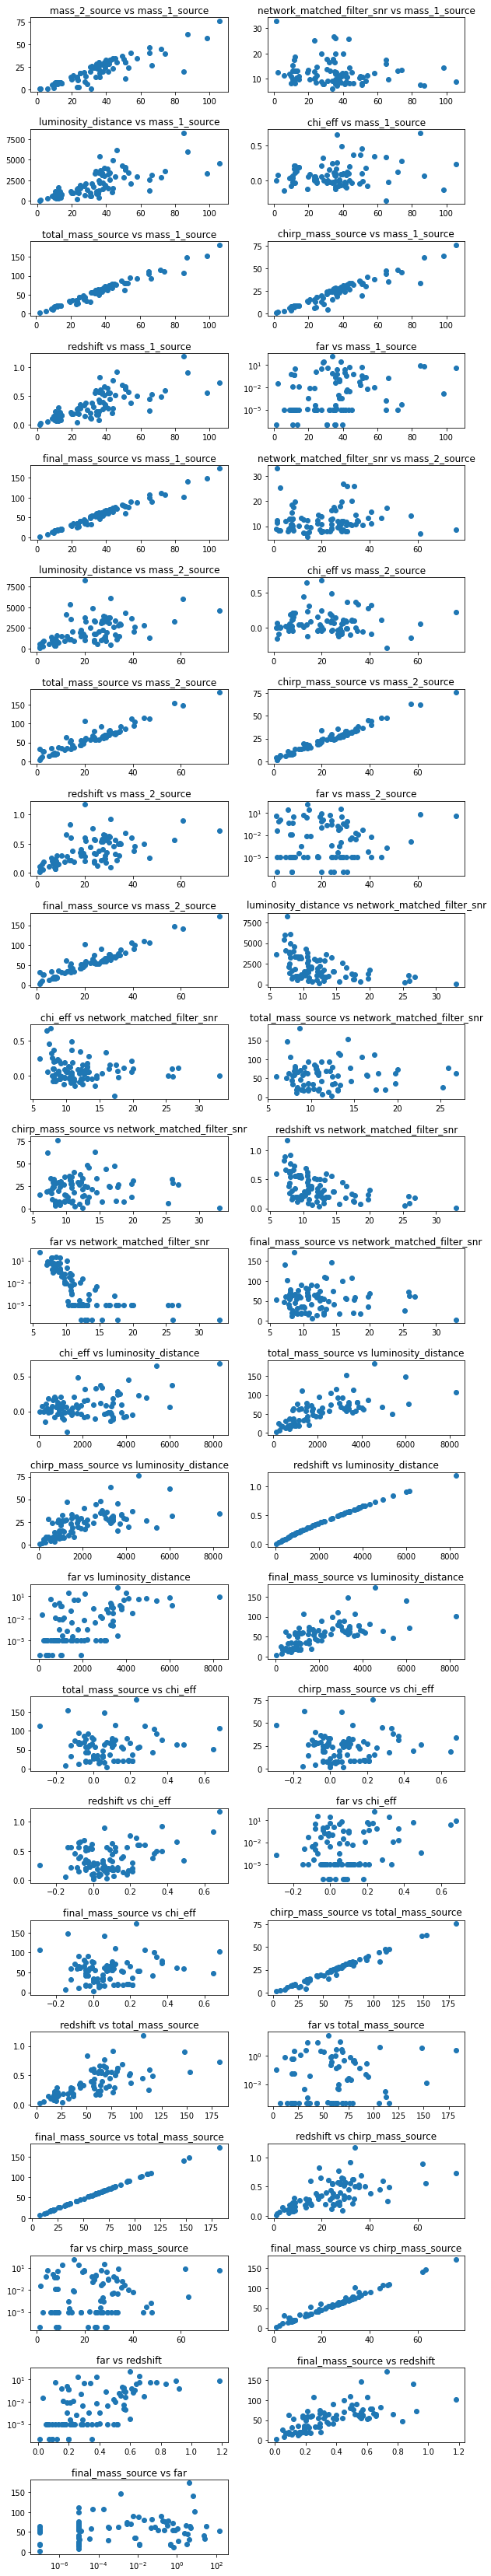

In [58]:
final.replace(np.NaN, 0)
to_graph = []
ligo = pd.read_csv("Ligo.csv")
for i in final.columns:
    for j in final.columns:
        if final[i][j] != 0:
            if (j, i) not in to_graph:
                if (i != j):
                    to_graph.append((i,j))
fig = plt.figure(figsize=(10,60))
for i in range(len(to_graph)):
    plt.subplot(23, 2, i+1)
    
    plt.scatter(ligo[to_graph[i][0]], ligo[to_graph[i][1]])
    plt.title(f'{to_graph[i][1]} vs {to_graph[i][0]}')
    if(to_graph[i][0] == "far"):
        plt.xscale("log")
    if(to_graph[i][1] == "far"):
        plt.yscale("log")
plt.subplots_adjust(hspace=0.5)


Analyzing these graphs a few anomalies stand out. Firstly, the peculiarity of various relationships with far. It appears that a number of the events were all using the same far value in the search algorithm. Perhaps they are from the same region of space? More likely is that that far value (somewhere around $10^{-5} yr^{-1}$) is characteristic of a specific type of merger, i.e (black hole - black hole, neutron star -neutron-star, etc.) 

More interesting correlations, that were not immediately obvious were when signal to noise ratio was compared to redshift, luminosity distance and total mass. The strongest of these was found in luminosity distance, however the correlation can be seen through the other two variables as well. Since the strongest correlation was between luminosity distance and SNR this relationship is focused on. The next step was to fit a non-linear model to this data.

Text(0.5, 0, 'SNR')

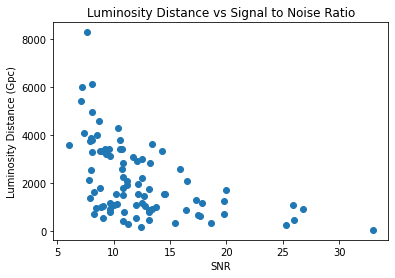

In [59]:
plt.scatter(ligo["network_matched_filter_snr"], ligo["luminosity_distance"])
x = ligo["network_matched_filter_snr"].to_numpy()
plt.title("Luminosity Distance vs Signal to Noise Ratio")
plt.ylabel(f'Luminosity Distance ({u.Gpc})')
plt.xlabel("SNR")

Although achieved through a significant amount of trial and error, the best model was $7000e^{-1x} + 0x$. To further cement the correlation (and for my own enjoyment), a machine learning algorithm was used to predict points based on the data. Although the outcome mainly shows that the model is indeed a decent fit, running the algorithm on a larger data set may prove that the model is inaccurate at extrema and edge cases. 

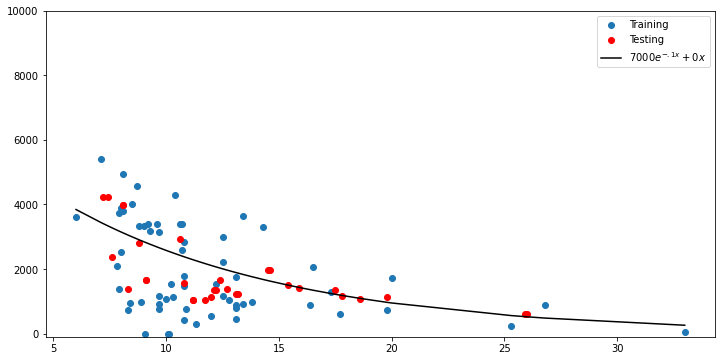

In [21]:
# From Lecture 28
def f_nonlinear(x,A=1,B=2,C=3,addnoise=False,noise=1.0,plot=False):
    if addnoise:
        noise = np.random.normal(scale=noise,size=len(x))
    else:
        noise = 0
    y = A*np.exp(-B*x) + C*x + noise

    if plot:
        plt.scatter(x,y)
    return y

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# x = ligo.loc[ligo[].notna()].to_numpy()
x = ligo.loc[ligo['luminosity_distance'].notna(), 'network_matched_filter_snr'].to_numpy()
y = ligo.loc[ligo['luminosity_distance'].notna(), 'luminosity_distance'].to_numpy()


x_train, x_test, y_train, y_test =\
 train_test_split(x, y, test_size=0.33, random_state=42)

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train.reshape(-1, 1), y_train)
pred = regr.predict(x_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.scatter(x_train,y_train,label="Training")
plt.scatter(x_test,pred,color='r',label="Testing")
x.sort()
plt.plot(x,f_nonlinear(x,A=7000,B=0.1, C=0),color='k', label=r"$7000e^{-.1x} + 0x$");

plt.ylim(-100, 10000)
plt.legend();


What is the significance of the strong correlation between SNR and luminosity distance? SNR measures the strength of the signal vs the noise, so at lower SNR values the signal is harder to decern from the nosie. A negative correlation to luminosity distance makes sense. As the source of a signal gets farther away it will encounter more interference from gas clouds, galaxies and any other objects between the source and Earth. What was unexpected was a non-linear correlation. Looking at the equation relating flux, luminosity, and distance it becomes more apparent:
$$
f = \frac{L}{4\pi d^{2}}
$$

As the distance between the Earth and a source object increases, the flux falls off proportional to $d^{2}$ thus it makes sense that the SNR ratio decreases exponentially when the distance increases. The signal strength is proportional to the distance between the Earth and the signal source. In essence this is a convoluted way of showing the exponential relationship between flux and distance.  

<H2 align="center">Acknowledgements<H2>

Thank you Professor Darling for the general help in answering my questions during tutorial

<H3 align=center>References</H3>

[1] LIGO Scientific Collaboration, B. P. Abbott et al. (2016). "Observation of Gravitational Waves from a Binary Black Hole Merger". Physical Review Letters. 116 (6): 061102. \
[2] What is an Interferometer? (n.d.). LIGO Lab | Caltech \
[3] Dong, Subo; et al. (2015). "ASASSN-15lh: A highly super-luminous supernova". Science. 351 (6276): 257–260. \
[4] R. Abbott et al. (LIGO Scientific Collaboration and Virgo Collaboration), "Open data from the first and second observing runs of Advanced LIGO and Advanced Virgo", SoftwareX 13 (2021) 100658.